## 数据可视化

In [1]:
import pandas as pd

In [2]:
# 读取数据
df_ads = pd.read_csv("dataset/易速鲜花微信软文.csv")
df_ads.head()  # 显示前几行

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


In [3]:
# !pip install matplotlib  # 安装画图工具包

In [4]:
import matplotlib.pyplot as plt  # python画图工具库

In [5]:
# ! pip install seaborn  -i https://mirrors.aliyun.com/pypi/simple  # 统计学数据可视化工具库

In [6]:
import seaborn as sns

## 绘制散点图
- 分析点赞数和浏览量的分布状态

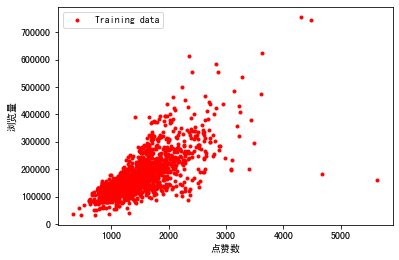

In [7]:
plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='Training data')
plt.xlabel('点赞数')
plt.ylabel('浏览量')
plt.legend()  # 显示图例
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

## 绘制箱线图

(-0.5, 9.5, 0.0, 800000.0)

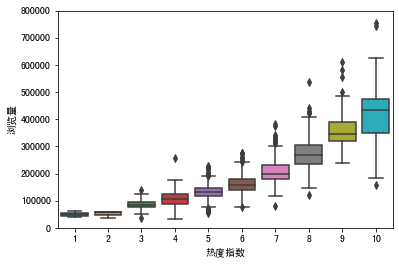

In [8]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1)
fig = sns.boxplot(x='热度指数', y='浏览量', data=data)  # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000)  # 指定y坐标轴

## 数据清洗

In [9]:
df_ads.isna()

,点赞数,转发数,热度指数,文章评级,浏览量
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1455,False,False,False,False,False
1456,False,False,False,False,False
1457,False,False,False,False,False
1458,False,False,False,False,False


In [10]:
df_ads.isna().sum()  # 统计nan出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [11]:
df_ads = df_ads.dropna()  # 删除出现nan的行

In [12]:
df_ads.isna().sum()

点赞数     0
转发数     0
热度指数    0
文章评级    0
浏览量     0
dtype: int64

## 构建特征集和标签集

In [13]:
X = df_ads.drop(['浏览量'], axis=1)  # 特征集，Drop掉标签相关的字段

In [14]:
X.head()

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [15]:
y = df_ads.浏览量  # 标签集

In [16]:
y

0       260004
1       100004
2       164502
3       163001
4       260401
         ...  
1455    140001
1456    163503
1457    392501
1458    138805
1459    193005
Name: 浏览量, Length: 1423, dtype: int64

In [17]:
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

## 拆分训练集、验证集、测试集

In [18]:
# ! pip install scikit-learn  -i https://mirrors.aliyun.com/pypi/simple

In [19]:
from sklearn.model_selection import train_test_split
# 指定一个 random_state 值，这样就保证程序每次运行都分割一样的训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 选择算法并建立模型

In [20]:
from sklearn.linear_model import LinearRegression  
lineareg_model = LinearRegression()  # 使用线性回归算法建立模型

In [21]:
lineareg_model.fit(X_train, y_train)  # 用训练数据集数据，训练模型，拟合函数，确定内部参数

LinearRegression()

In [22]:
y_pred = lineareg_model.predict(X_test)  # 预测测试集的Y值

In [26]:
# y_pred

In [27]:
df_ads_pred = X_test.copy()  # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test   # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred  # 测试集标签预测值
df_ads_pred

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


In [29]:
print('当前模型的4个特征的权重分别是: ', lineareg_model.coef_)
print('当前模型的截距（偏置）是: ', lineareg_model.intercept_)

当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857178


In [31]:
print("线性回归预测评分：", lineareg_model.score(X_test, y_test)) # 评估模型

线性回归预测评分： 0.740552064611524
